In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [2]:
dry_run = False
epochs = 10
repeat_count = 100

Using genre from playlist source
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

mean: tensor([[[31.1943]]]), std: tensor([[[293.4358]]])
Dataset creation finished in: 108.7538 seconds


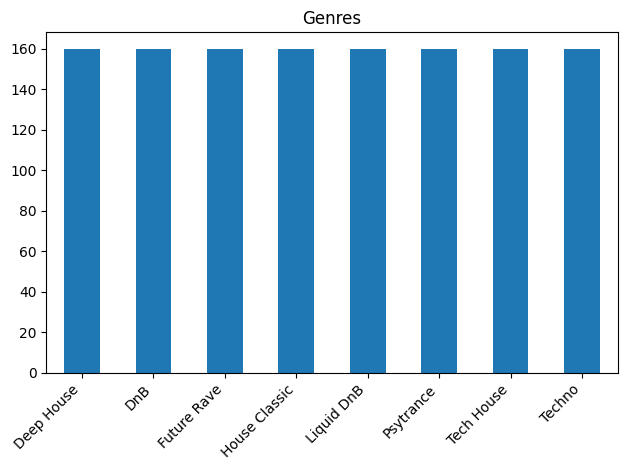

In [4]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(win_length=2048),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run
)

analysis.summarize_dataset(dataset)

  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Starting training for 10 epochs
Epoch   1/10, train_loss: 2.003, train_acc: 0.265, val_loss: 1.989, val_acc: 0.266, in 93.44s
Epoch   2/10, train_loss: 1.906, train_acc: 0.381, val_loss: 1.835, val_acc: 0.441, in 90.02s
Epoch   3/10, train_loss: 1.812, train_acc: 0.481, val_loss: 1.769, val_acc: 0.509, in 94.53s
Epoch   4/10, train_loss: 1.758, train_acc: 0.532, val_loss: 1.732, val_acc: 0.548, in 88.83s
Epoch   5/10, train_loss: 1.721, train_acc: 0.566, val_loss: 1.697, val_acc: 0.579, in 91.00s
Epoch   6/10, train_loss: 1.699, train_acc: 0.585, val_loss: 1.733, val_acc: 0.541, in 94.76s
Epoch   7/10, train_loss: 1.679, train_acc: 0.604, val_loss: 1.690, val_acc: 0.583, in 94.91s
Epoch   8/10, train_loss: 1.663, train_acc: 0.619, val_loss: 1.662, val_acc: 0.611, in 94.97s
Epoch   9/10, train_loss: 1.653, train_acc: 0.628, val_loss: 1.666, val_acc: 0.607, in 93.71s
Epoch  10/10, train_loss: 1.640, train_acc: 0.641, val_loss: 1.679, val_acc: 0.595, in 94.20s
Training finished in: 930.37

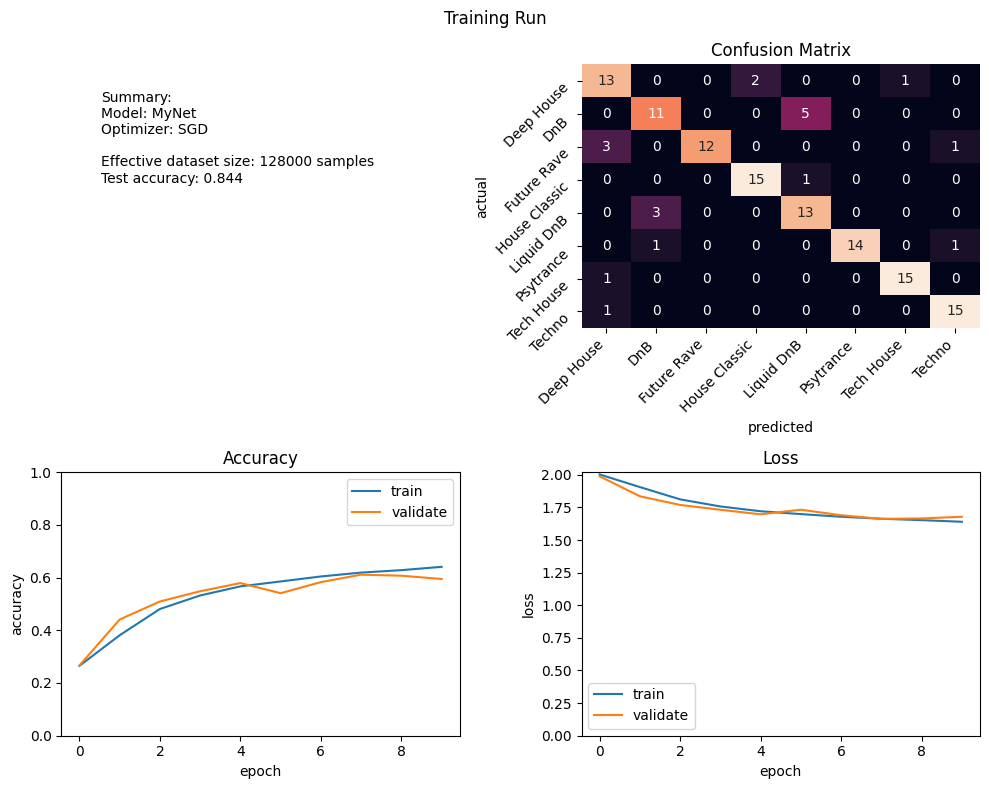

In [4]:
model = networks.MgcNet(dataset.num_classes)
run = TrainingRun(dataset, model, batch_size=128, epochs=epochs, dry_run=dry_run, repeat_count=repeat_count)
run.start()
run.test()
run.plot()